In [1]:
import (
    "os"
    "log"
    "bytes"
    "image/color"
    
    "gonum.org/v1/gonum/floats"
    "gonum.org/v1/plot"
    "gonum.org/v1/plot/plotter"
    "gonum.org/v1/plot/vg"
    "github.com/go-gota/gota/dataframe"
)

In [2]:
f, err := os.Open("fleet_data.csv")
if err != nil {
    log.Fatal(err)
}
driverDF := dataframe.ReadCSV(f)
f.Close()

In [3]:
yVals := driverDF.Col("Distance_Feature").Float()

var clusterOne [][]float64
var clusterTwo [][]float64

for i, xVal := range driverDF.Col("Speeding_Feature").Float() {
    distanceOne := floats.Distance([]float64{yVals[i], xVal}, []float64{50.05, 8.83}, 2)
    distanceTwo := floats.Distance([]float64{yVals[i], xVal}, []float64{180.02, 18.29}, 2)
    if distanceOne < distanceTwo {
        clusterOne = append(clusterOne, []float64{xVal, yVals[i]})
        continue
    }
    clusterTwo = append(clusterTwo, []float64{xVal, yVals[i]})
}

In [4]:
func displayPlot(p *plot.Plot) {
    var buf bytes.Buffer
    c, err := p.WriterTo(6*vg.Inch, 6*vg.Inch, "png")
    if err != nil {
        panic(err)
    }
    
    if _, err := c.WriteTo(&buf); err != nil {
        panic(err)
    }
    
    Display(display.PNG(buf.Bytes()))
}

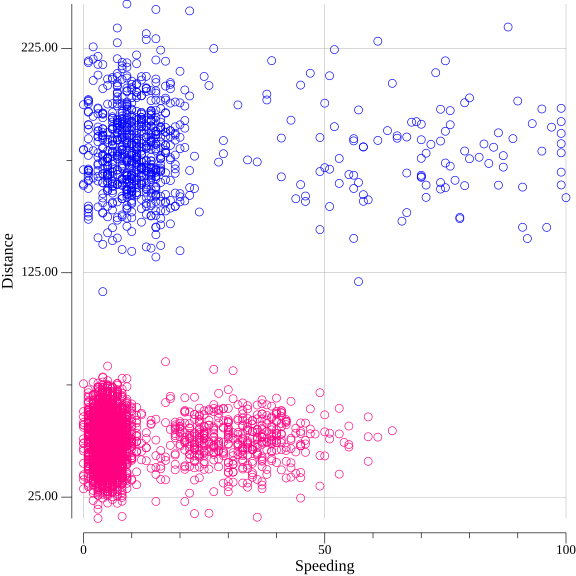

In [5]:
ptsOne := make(plotter.XYs, len(clusterOne))
ptsTwo := make(plotter.XYs, len(clusterTwo))

for i, point := range clusterOne {
    ptsOne[i].X = point[0]
    ptsOne[i].Y = point[1]
}

for i, point := range clusterTwo {
    ptsTwo[i].X = point[0]
    ptsTwo[i].Y = point[1]
}

p := plot.New()
p.X.Label.Text = "Speeding"
p.Y.Label.Text = "Distance"
p.Add(plotter.NewGrid())

sOne, err := plotter.NewScatter(ptsOne)
if err != nil {
    log.Fatal(err)
}
sOne.GlyphStyle.Color = color.RGBA{R: 255, B: 128, A: 255}
sOne.GlyphStyle.Radius = vg.Points(3)

sTwo, err := plotter.NewScatter(ptsTwo)
if err != nil {
    log.Fatal(err)
}
sTwo.GlyphStyle.Color = color.RGBA{B: 255, A: 255}
sTwo.GlyphStyle.Radius = vg.Points(3)

p.Add(sOne, sTwo)

displayPlot(p)